**Умова:**

Протягом 50 років вимірювався рівень води навесні під час повені відносно умовного нуля. Результати вимірювання наведено
у вигляді інтервального статистичного розподілу:

| $x_i$ | 0-24   | 24-48  | 48-72  | 72-96  | 96-120 | 120-144| 144-168| 168-192|192-216| 
| :---  | :----: | :----: | :----: | :----: | :----: | :----: | :----: | :----: | ---:  |
| $n_i$ | 1      | 2      | 4      | 6      | 12     | 16     | 6      | 2      | 1     |   

За заданими статистичними розподілами вибірки висунути $H_0$ про закон розподілу ознаки генеральної сукупності і при рівні
значущості $\alpha = 0,01$ перевірити її правильність.

**Розв'язок:**

**1. Для заданого статистичного розподілу, побудуємо гістограму частот.**

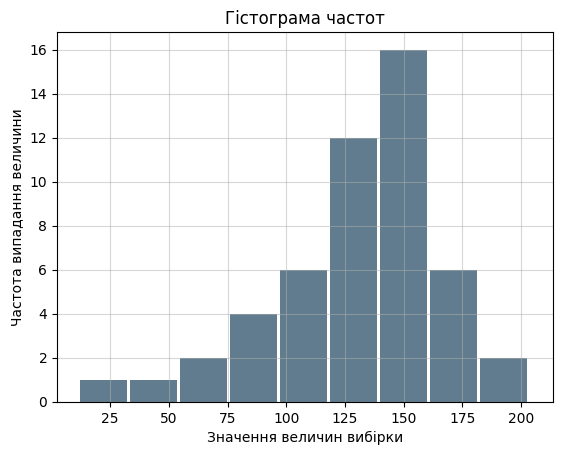

In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp


x = [24, 48, 72, 96, 120, 144, 168, 192, 216]
n = [1, 2, 4, 6, 12, 16, 6, 2, 1]

series = pd.Series([x[i] for i in range(len(x)) for _ in range(n[i])])

series_gist.plot(kind="hist", fontsize=10, color='#607c8e', width = 20, bins=len(x))
plt.title('Гістограма частот')
plt.xlabel('Значення величин вибірки')
plt.ylabel('Частота випадання величини')
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0.5)
plt.show()


За формою гістограми частот можемо припустити ймовірніть гіпотези $H_0$, що дані результати досліджень мають нормальний закон розподілу. Виконаємо розрахунки для перевірки правильності припущення.

**1. Виконаємо перевірку правильності нульової гіпотези за критерієм Шапіро програмними засобами.**

In [217]:
stat, p = sp.stats.shapiro(series)
print("Statistics=%.3f, p-value=%.3f"%(stat, p))
if p > alpha:
    print("За критерієм Шапіро, нульову гіпотезу для даної вибірки підтверджено")
else:
    print("За критерієм Шапіро, нульову гіпотезу не підтверджено")

Statistics=0.950, p-value=0.034
За критерієм Шапіро, нульову гіпотезу для даної вибірки підтверджено


**2. Виконаємо перевірку правильності нульової гіпотези за критерієм узгодженості Пірсона програмними засобами.**

In [218]:
stat, p = sp.stats.normaltest(series)
print("Statistics=%.3f, p-value=%.3f"%(stat, p))
if p > alpha:
    print("За критерієм узгодженності Пірсона, нульову гіпотезу для даної вибірки підтверджено")
else:
    print("За критерієм узгодженності Пірсона, нульову гіпотезу не підтверджено")

Statistics=2.365, p-value=0.307
За критерієм узгодженності Пірсона, нульову гіпотезу для даної вибірки підтверджено


**3. Виконаємо перевірку правильності нульової гіпотези за критерієм узгодженнсті Пірсона методом розрахунків.**

3.1. Знайдемо вибіркове середнє і середнє квадратичне відхилення вибірки.

In [219]:
alpha = 0.01
series_average = pd.Series([series[i]/2 if i == 0 else series[i]-series[0]/2 for i in range(len(series))])

In [239]:
mean, std = round(series_average.mean(), 2), round(series_average.std(), 2)
print(f"mean = {mean}\nstd = {std}")

mean = 114.72
std = 38.5


3.2. Преведемо таблицю обчислення теоретичних частот.

In [237]:
df = pd.DataFrame(x, columns = ["x"])
df["x_1"] = [i - df["x"][0] for i in df["x"]]
df["z_i"] = [round((i-mean)/std, 2) if i != df.loc[8, "x"] else None  for i in df["x"]]
df["z_i_1"] = [round((i-mean)/std, 2) if i != df.loc[0, "x_1"] else None for i in df["x_1"]]
df["F_zi"] =[round(sp.stats.norm.cdf(df.loc[i, 'z_i']) - 0.5, 4) if i != 8  else 0.5 for i in range(len(df['z_i']))] 
df["F_zi_1"] =[round(sp.stats.norm.cdf(df.loc[i, 'z_i_1']) - 0.5, 4) if i != 0  else -0.5 for i in range(len(df['z_i_1']))]
df["P_i"] = [df.loc[i, "F_zi"]-df.loc[i, "F_zi_1"] for i in range(len(df))]
df["N_i"] = [i*len(series) for i in df["P_i"]]
df["N"] = [i for i in n]
df["N_K_e"] = [(df.loc[i, "N"]-df.loc[i, "N_i"])**2/df.loc[i, "N_i"] for i in range(len(df))]

df

,x,x_1,z_i,z_i_1,F_zi,F_zi_1,P_i,N_i,N,N_K_e
0,24,0,-2.36,NaN,-0.4909,-0.5000,0.0091,0.455,1,0.652802
1,48,24,-1.73,-2.36,-0.4582,-0.4909,0.0327,1.635,2,0.081483
2,72,48,-1.11,-1.73,-0.3665,-0.4582,0.0917,4.585,4,0.074640
3,96,72,-0.49,-1.11,-0.1879,-0.3665,0.1786,8.930,6,0.961355
4,120,96,0.14,-0.49,0.0557,-0.1879,0.2436,12.180,12,0.002660
5,144,120,0.76,0.14,0.2764,0.0557,0.2207,11.035,16,2.233913
6,168,144,1.38,0.76,0.4162,0.2764,0.1398,6.990,6,0.140215
7,192,168,2.01,1.38,0.4778,0.4162,0.0616,3.080,2,0.378701
8,216,192,NaN,2.01,0.5000,0.4778,0.0222,1.110,1,0.010901


3.3. Знайдемо емпіричну область.

In [238]:
K_e = df["N_K_e"].sum()
print("Емпірична область = ", round(K_e, 2))

Емпірична область =  4.54


3.4. Знайдемо критичну область.

З таблиці критичних точок розподілу, при заданому рівні зачущості $\alpha = 0,01$ і кількості ступенів свободи $ r = m - s - 1 = 9 - 2 - 1 = 6$ знайдемо критичну область $K_kp = 16,8$

In [241]:
K_kp = 16.8
if K_kp > K_e:
    print("За критерієм узгодженності Пірсона, нульову гіпотезу для даної вибірки підтверджено")
else:
    print("За критерієм узгодженності Пірсона, нульову гіпотезу не підтверджено")

За критерієм узгодженності Пірсона, нульову гіпотезу для даної вибірки підтверджено
